In [1]:
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import clear_output

import json

In [2]:
MODEL_FILE = "3.1. Esembler_RandomForest_Application.json"

In [3]:
# Random Forest
TREE_PARAMS = {
    "max_depth": 15,
    "min_samples_leaf": 12,
    "n_estimators": 900,
    "random_state": 0,
    "n_jobs": -1
}

In [4]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [5]:
# Check if Models exists

In [6]:
model_path = DATASET_DIR / "Models" / MODEL_FILE
MODEL_EXIST = model_path.is_file()

In [7]:
# Daten

In [8]:
app_train = pd.read_csv(DATASET_DIR / "4. FillNA" / "application.csv")
app_train = app_train.set_index("SK_ID_CURR")

In [9]:
df = app_train[["TARGET", "A_EXT_SOURCE_1", "A_EXT_SOURCE_2", "A_EXT_SOURCE_3"]].copy()

In [10]:
df.head()

,TARGET,A_EXT_SOURCE_1,A_EXT_SOURCE_2,A_EXT_SOURCE_3
SK_ID_CURR,,,,
100002,1.0,0.083037,0.262949,0.139376
100003,0.0,0.311267,0.622246,0.344844
100004,0.0,0.550824,0.555912,0.729567
100006,0.0,0.666039,0.650442,0.565898
100007,0.0,0.559619,0.322738,0.571390


In [11]:
import seaborn as sns

In [12]:
payback = df[df["TARGET"] == 0]
default = df[df["TARGET"] == 1]

In [13]:
df.head()

,TARGET,A_EXT_SOURCE_1,A_EXT_SOURCE_2,A_EXT_SOURCE_3
SK_ID_CURR,,,,
100002,1.0,0.083037,0.262949,0.139376
100003,0.0,0.311267,0.622246,0.344844
100004,0.0,0.550824,0.555912,0.729567
100006,0.0,0.666039,0.650442,0.565898
100007,0.0,0.559619,0.322738,0.571390


In [14]:
ids = app_train.index.values

In [15]:
import random

In [16]:
ids = random.sample(list(ids), k=len(ids))

In [17]:
s = slice(0,int(len(ids)*0.25))

In [18]:
app_train.loc[ids[s], "A_EXT_SOURCE_1"] = app_train.loc[ids[s], "A_EXT_SOURCE_1"] * 0.25
app_train.loc[ids[s], "A_EXT_SOURCE_2"] = app_train.loc[ids[s], "A_EXT_SOURCE_2"] * 0.25
app_train.loc[ids[s], "A_EXT_SOURCE_3"] = app_train.loc[ids[s], "A_EXT_SOURCE_3"] * 0.25
app_train.loc[ids[s], "TARGET"] = 1

In [19]:
app_train.loc[ids[s], ["A_EXT_SOURCE_1", "A_EXT_SOURCE_2", "A_EXT_SOURCE_3"]].head()

,A_EXT_SOURCE_1,A_EXT_SOURCE_2,A_EXT_SOURCE_3
SK_ID_CURR,,,
333270,0.146565,0.163692,0.148864
119323,0.076696,0.116571,0.168853
372320,0.169324,0.087929,0.096906
182936,0.213635,0.131405,0.125961
285000,0.178843,0.143333,0.167264


In [20]:
app_train.head()

,TARGET,A_CODE_GENDER,A_NAME_INCOME_TYPE,A_NAME_EDUCATION_TYPE,A_FLAG_EMP_PHONE,A_OCCUPATION_TYPE,A_REGION_RATING_CLIENT,A_REG_CITY_NOT_WORK_CITY,A_ORGANIZATION_TYPE,A_FLAG_DOCUMENT_3,A_CNT_CHILDREN,A_OBS_60_CNT_SOCIAL_CIRCLE,A_DEF_60_CNT_SOCIAL_CIRCLE,A_AMT_REQ_CREDIT_BUREAU_HOUR,A_AMT_REQ_CREDIT_BUREAU_DAY,A_AMT_REQ_CREDIT_BUREAU_WEEK,A_AMT_REQ_CREDIT_BUREAU_MON,A_AMT_REQ_CREDIT_BUREAU_QRT,A_AMT_REQ_CREDIT_BUREAU_YEAR,A_AMT_INCOME_TOTAL,A_AMT_CREDIT,A_AMT_ANNUITY,A_REGION_POPULATION_RELATIVE,A_DAYS_BIRTH,A_DAYS_EMPLOYED,A_DAYS_REGISTRATION,A_DAYS_ID_PUBLISH,A_EXT_SOURCE_1,A_EXT_SOURCE_2,A_EXT_SOURCE_3,A_BASEMENTAREA_AVG,A_YEARS_BEGINEXPLUATATION_AVG,A_LANDAREA_AVG,A_NONLIVINGAREA_AVG,A_TOTALAREA_MODE,A_CREDIT/INCOME
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,202500.0,406597.5,24700.5,0.018801,-9461.0,-637.0,-3648.0,-2120.0,0.083037,0.262949,0.139376,0.036900,0.972200,0.036900,0.000000,0.014900,2.007889
100003,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,270000.0,1293502.5,35698.5,0.003541,-16765.0,-1188.0,-1186.0,-291.0,0.311267,0.622246,0.344844,0.052900,0.985100,0.013000,0.009800,0.071400,4.790750
100004,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67500.0,135000.0,6750.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,0.550824,0.555912,0.729567,0.075009,0.981667,0.067504,0.021810,0.088649,2.000000
100006,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.008068,0.005653,0.044626,0.213765,0.250421,2.217301,135000.0,312682.5,29686.5,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,0.666039,0.650442,0.565898,0.076735,0.979744,0.068598,0.017830,0.082112,2.316167
100007,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121500.0,513000.0,21865.5,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,0.139905,0.080685,0.142848,0.071043,0.982023,0.048938,0.021351,0.076234,4.222222


In [21]:
df = app_train[["TARGET", "A_EXT_SOURCE_1", "A_EXT_SOURCE_2", "A_EXT_SOURCE_3"]].copy()

In [22]:
payback_sim = df[df["TARGET"] == 0]
default_sim = df[df["TARGET"] == 1]

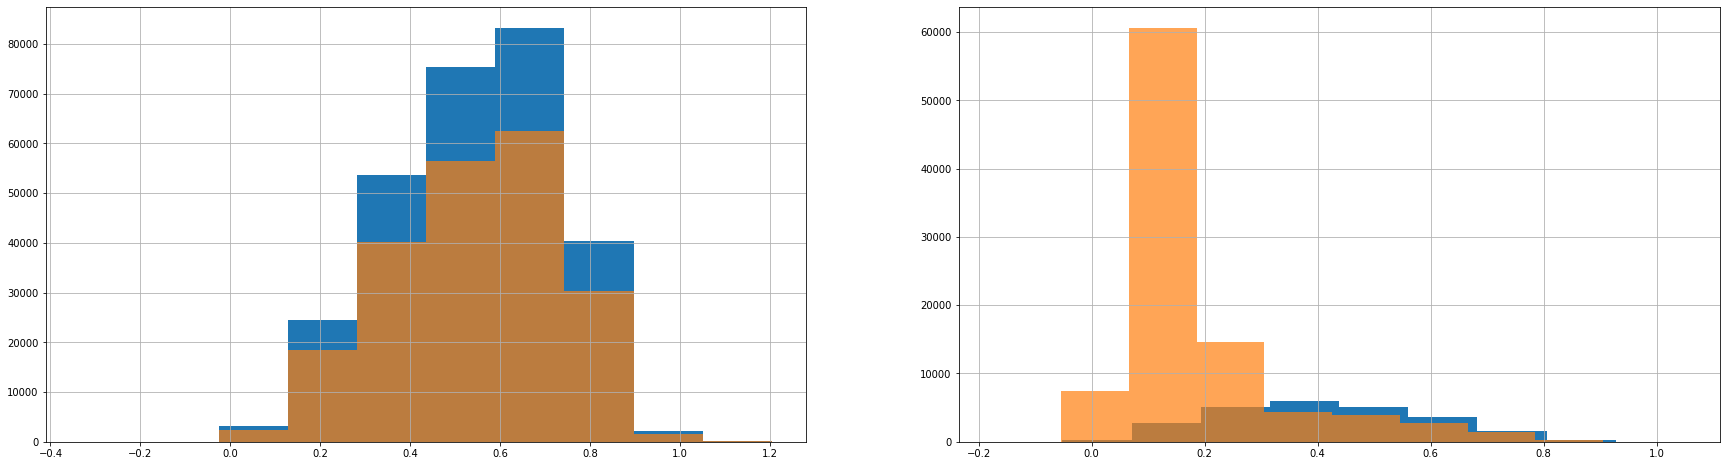

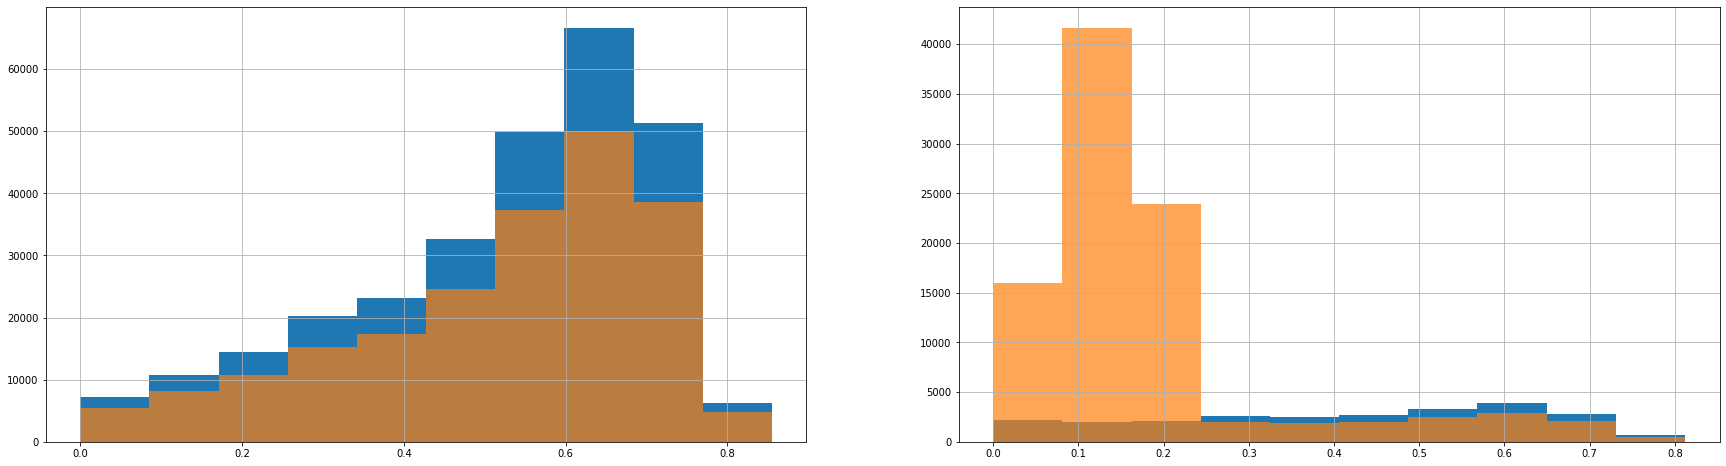

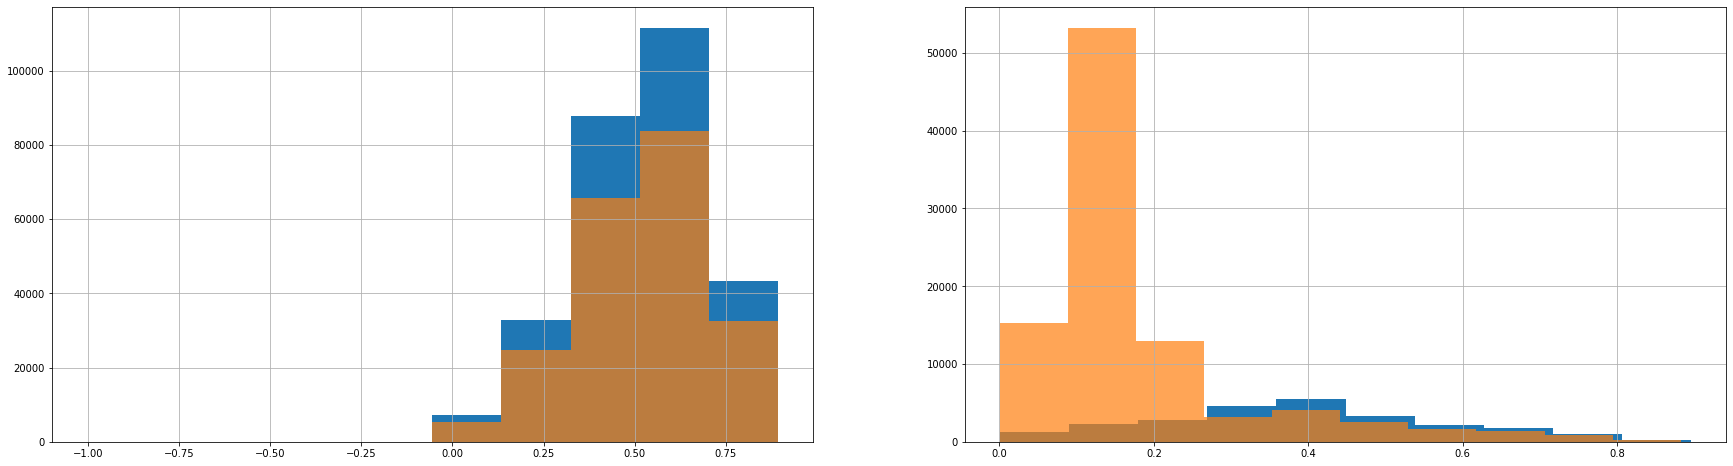

In [34]:
for head in ["A_EXT_SOURCE_1", "A_EXT_SOURCE_2", "A_EXT_SOURCE_3"]:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 8)
    
    payback[head].hist(ax=ax1)
    payback_sim[head].hist(ax=ax1, alpha=0.7)
    
    default[head].hist(ax=ax2)
    default_sim[head].hist(ax=ax2, alpha=0.7)
    plt.show()

In [24]:
app_train.head()

,TARGET,A_CODE_GENDER,A_NAME_INCOME_TYPE,A_NAME_EDUCATION_TYPE,A_FLAG_EMP_PHONE,A_OCCUPATION_TYPE,A_REGION_RATING_CLIENT,A_REG_CITY_NOT_WORK_CITY,A_ORGANIZATION_TYPE,A_FLAG_DOCUMENT_3,A_CNT_CHILDREN,A_OBS_60_CNT_SOCIAL_CIRCLE,A_DEF_60_CNT_SOCIAL_CIRCLE,A_AMT_REQ_CREDIT_BUREAU_HOUR,A_AMT_REQ_CREDIT_BUREAU_DAY,A_AMT_REQ_CREDIT_BUREAU_WEEK,A_AMT_REQ_CREDIT_BUREAU_MON,A_AMT_REQ_CREDIT_BUREAU_QRT,A_AMT_REQ_CREDIT_BUREAU_YEAR,A_AMT_INCOME_TOTAL,A_AMT_CREDIT,A_AMT_ANNUITY,A_REGION_POPULATION_RELATIVE,A_DAYS_BIRTH,A_DAYS_EMPLOYED,A_DAYS_REGISTRATION,A_DAYS_ID_PUBLISH,A_EXT_SOURCE_1,A_EXT_SOURCE_2,A_EXT_SOURCE_3,A_BASEMENTAREA_AVG,A_YEARS_BEGINEXPLUATATION_AVG,A_LANDAREA_AVG,A_NONLIVINGAREA_AVG,A_TOTALAREA_MODE,A_CREDIT/INCOME
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,202500.0,406597.5,24700.5,0.018801,-9461.0,-637.0,-3648.0,-2120.0,0.083037,0.262949,0.139376,0.036900,0.972200,0.036900,0.000000,0.014900,2.007889
100003,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,270000.0,1293502.5,35698.5,0.003541,-16765.0,-1188.0,-1186.0,-291.0,0.311267,0.622246,0.344844,0.052900,0.985100,0.013000,0.009800,0.071400,4.790750
100004,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67500.0,135000.0,6750.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,0.550824,0.555912,0.729567,0.075009,0.981667,0.067504,0.021810,0.088649,2.000000
100006,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.008068,0.005653,0.044626,0.213765,0.250421,2.217301,135000.0,312682.5,29686.5,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,0.666039,0.650442,0.565898,0.076735,0.979744,0.068598,0.017830,0.082112,2.316167
100007,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121500.0,513000.0,21865.5,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,0.139905,0.080685,0.142848,0.071043,0.982023,0.048938,0.021351,0.076234,4.222222


In [25]:
app_train.to_csv(DATASET_DIR / "5. Simulation" / "app_train25.csv")